# Kolokwium 7.12.2020 Maciej Czarkowski 292810
Zadaniem tego kolokwium jest potwierdzenie przez Państwa posidania umiejętności budowania modelu regresji na przykładzie danych zawierających ceny nieruchomości znajdujących się w pliku "domy.csv". W zadaniu należy wykorzystać wiedzę poznaną na laboratorium w tym metody regularyzacji, metody wyboru i tworzenia nowych zmiennych, określenie jakości modelu.

Za kolokwium można zdobyć 25 pkt. Za każde zadanie można dostać od 0 do 5 pkt.

Pracujemy samodzielnie. Można korzystać z notatek i dokumentacji.

Praca zespołowa jest zabroniona. 

### Uwaga !!!
Każda osoba pracuje na innych danych, więc podanie wniosków nieadekwatnych do otrzymanych wyników będzie uznane za próbę ściągania i karane niezaliczeniem kolokwium, a co za tym idzie przedmiotu.

In [86]:
# Wyczanie pakietów podstawowych
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
# Wczytanie danych
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
domy = pd.read_csv("domy.csv", sep=',', dtype=dtype_dict)
domy_2 = domy.copy()
domy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131,3,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530.0,1509.0
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813,2,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830.0,7200.0
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350,2,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020.0,2007.0
21611,0291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388,2,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410.0,1287.0


### Podział danych zostanie dokonany zależnie od numeru indeksu

In [88]:
from sklearn.model_selection import train_test_split
# !!!Jako random_state podaj swój numer indeksu!!!
numer_indeksu = 292810
ceny = domy['price']
domy.drop(['price', 'id','date','zipcode'], axis=1, inplace=True)
# Użyję w późniejszym etapie, po dodaniu nowych cech
# domy_train, domy_test, ceny_train, ceny_test = train_test_split(domy, ceny, test_size=0.33, random_state=numer_indeksu)
cechy = domy.columns.values
cechy 

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'], dtype=object)

## Zadanie 1
Dokonaj analizy posiadanych zmiennych. Zakresy zmienności, korelacje, skośność. Dane nieużyteczne jak np. id można odrzucić. 

Zaproponuj 5 nowych cech będących wynikiem przeprowadzonych analiz lub doświadczeń.

In [89]:
# Wycinam dane do analizy, zrzucam niepotrzebne kolumny
domy_explo = domy_2.drop(['id', 'date', 'zipcode'], axis=1)
domy_explo

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.0,5650,1,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242,2,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000,1,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000,1,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080,1,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530.0,1131,3,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530.0,1509.0
21609,400000.0,4.0,2.50,2310.0,5813,2,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830.0,7200.0
21610,402101.0,2.0,0.75,1020.0,1350,2,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020.0,2007.0
21611,400000.0,3.0,2.50,1600.0,2388,2,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410.0,1287.0


In [90]:
# liczba obiektów
object_no = domy_explo.shape[0]
print(f"Liczba obiektów danych to {object_no}")
# liczba atrybutów
attr_no = domy_explo.shape[1]
print(f"Liczba cech to {attr_no}")
# liczba danych brakujących
missing_data_no = domy_explo.isnull().sum().sum()
print(f"Liczba brakujących danych to {missing_data_no}")

Liczba obiektów danych to 21613
Liczba cech to 18
Liczba brakujących danych to 0


**Nie mamy żadnych braków w danych, więc niekonieczna jest inputacja i nie musimy się obawiać przekłamaniami wynikającymi z braków danych**

**W kolejnym kroku obserwuję dane opisowe dotyczące analizowanego zbioru danych:**

In [91]:
print(domy_explo.describe())

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

         waterfront          view     condition         grade    sqft_above  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       0.007542      0.234303      3.409430      7.656873   1788.390691   
std        0.086517      0.766318      0.650743    

**Poza danymi opisowymi, warto zwizualizować te dane, np. na wykresach pudełkowych, które najlepiej opisują zmienność i zakresy danych**

Text(0.5, 1.0, 'Wykresy pudełkowe po pominięciu cen w analizie i wykorzystaniu skali logarytmicznej')

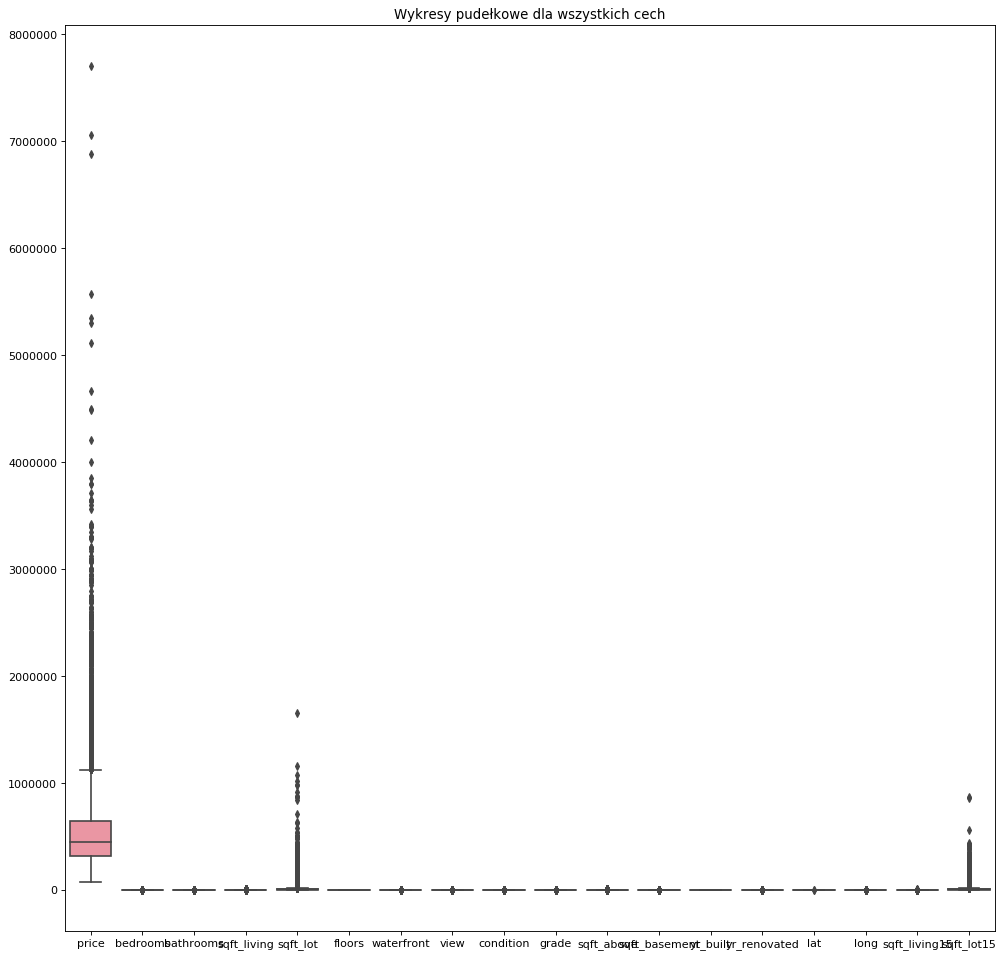

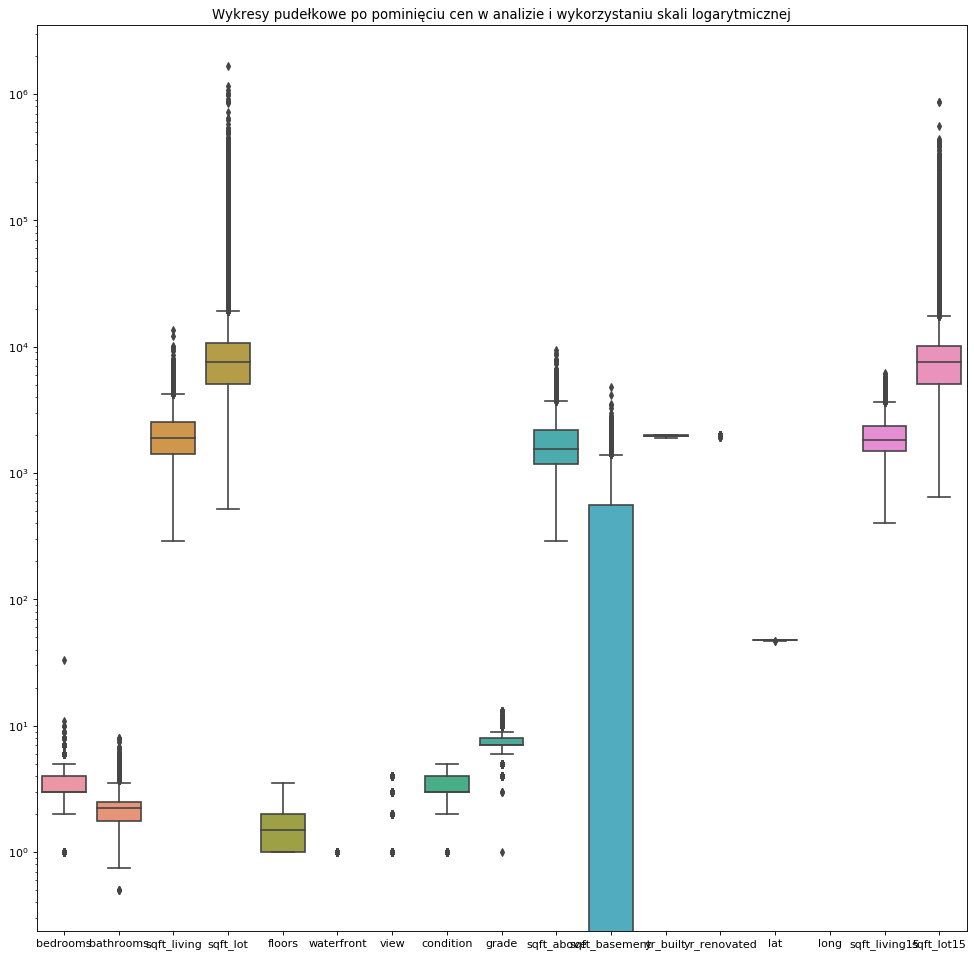

In [92]:
plt.figure(figsize=(15,15),dpi = 80)
sns.boxplot(data=domy_explo)
plt.title("Wykresy pudełkowe dla wszystkich cech")

#Jako, że widzimy, że analiza wykresów pudełkowych z uwzględnieniem cen zaburza mocno ogólny obraz,
#ponieważ zakres jej zmienności jest wyraźnie inny, odrzucam ją i pownownie dokonuję analizy cech wykorzystując skalę logarytmiczną
plt.figure(figsize=(15,15),dpi = 80)
bs = sns.boxplot(data=domy_explo.drop('price', axis=1))
bs.set_yscale('log')
plt.title("Wykresy pudełkowe po pominięciu cen w analizie i wykorzystaniu skali logarytmicznej")

**Czas na zbadanie skośności, histogramów**

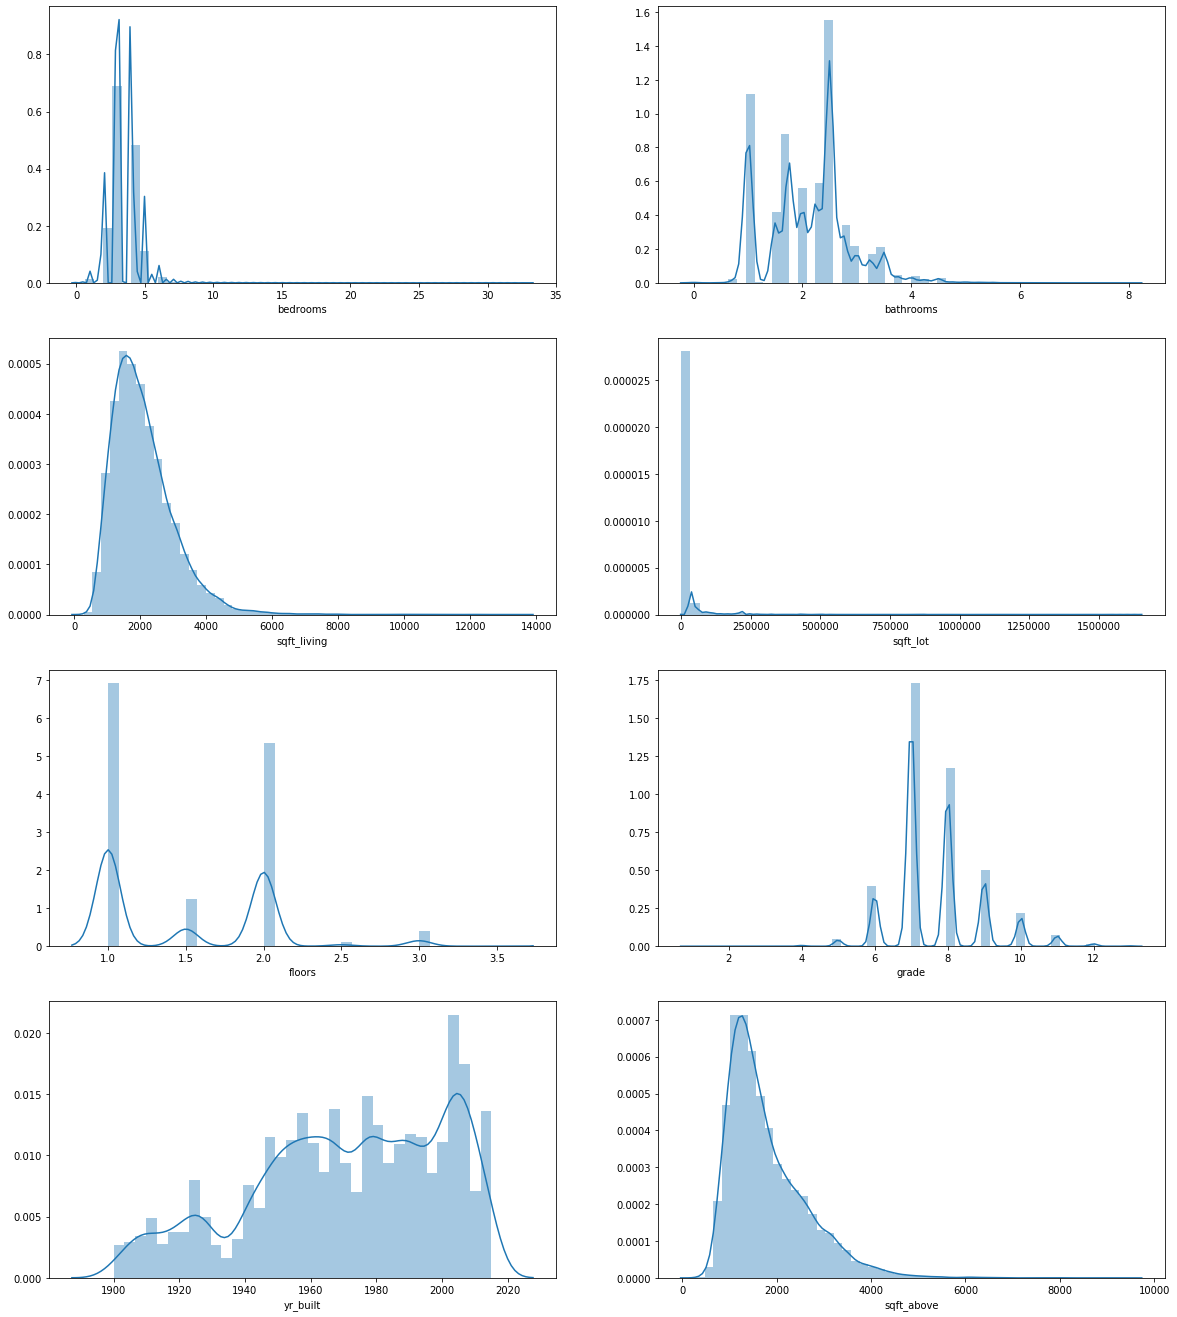

In [93]:
features = ['bedrooms','bathrooms','sqft_living', 'sqft_lot','floors','grade','yr_built','sqft_above']
plt.figure(figsize=(20,60))
for i, feature in enumerate(features):
    plt.subplot(10,2, i+1)
    sns.distplot(domy_explo.loc[:, feature])

**Analizy wykresowej dokonałem tylko dla kilku cech, dla których ma to sens. Bezcelowe jest np. analizowanie histogramów cech, gdzie przyjmowane wartości to 0,1, dlatego odrzuciłem m.in waterfront czy view. Dla zobrazowania skośności dla wszystkich cech co do wartości posłużę się funkcją skew() -- skew > 0 oznacza prawoskośność (im większe tym silniejszą), a skew < 0 lewoskośność (analogicznie im mniejsza tym silniejsza)**

In [94]:
domy_explo.skew()

price             4.024069
bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616177
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64

**W celu oceny zależności pomiędzy danymi analizuję macierz korelacji pomiędzy danymi**

Text(0.5, 1, 'Macierz korelacji pomiędzy cechami')

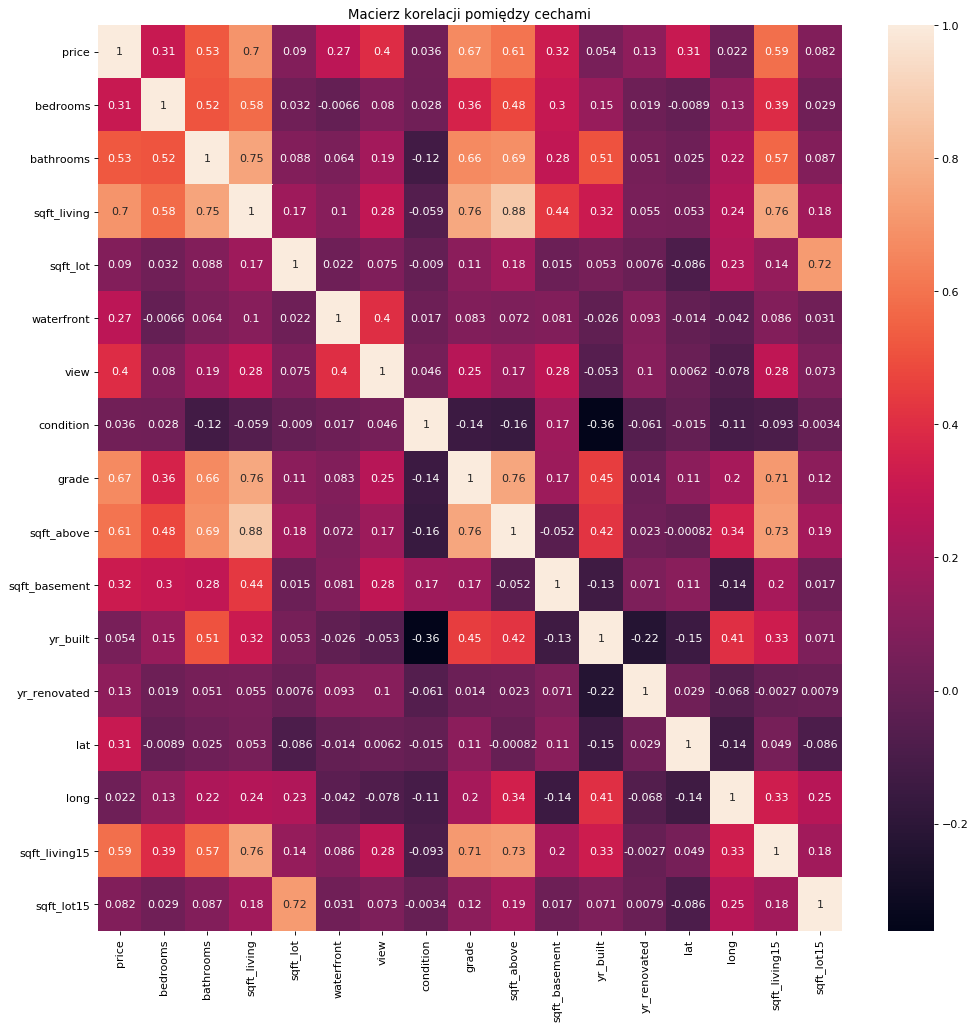

In [95]:
plt.figure(figsize=(15,15),dpi = 80)
sns.heatmap(domy_explo.corr(),annot = domy_explo.corr())
plt.title("Macierz korelacji pomiędzy cechami")

**Z powyższego wykresu można wychwycić np. parę sqft_above i sqft_living -- ich korelacja jest wysoka, dlatego do dalszych analiz możemy odrzucić jedną z nich -- odrzucam sqft_above**

In [ ]:
domy.drop('sqft_above', axis=1, inplace=True)

In [98]:
domy

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3.0,1.00,1180.0,5650,1,0,0,3,7,0,1955,0,47.5112,-122.257,1340.0,5650.0
1,3.0,2.25,2570.0,7242,2,0,0,3,7,400,1951,1991,47.7210,-122.319,1690.0,7639.0
2,2.0,1.00,770.0,10000,1,0,0,3,6,0,1933,0,47.7379,-122.233,2720.0,8062.0
3,4.0,3.00,1960.0,5000,1,0,0,5,7,910,1965,0,47.5208,-122.393,1360.0,5000.0
4,3.0,2.00,1680.0,8080,1,0,0,3,8,0,1987,0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3.0,2.50,1530.0,1131,3,0,0,3,8,0,2009,0,47.6993,-122.346,1530.0,1509.0
21609,4.0,2.50,2310.0,5813,2,0,0,3,8,0,2014,0,47.5107,-122.362,1830.0,7200.0
21610,2.0,0.75,1020.0,1350,2,0,0,3,7,0,2009,0,47.5944,-122.299,1020.0,2007.0
21611,3.0,2.50,1600.0,2388,2,0,0,3,8,0,2004,0,47.5345,-122.069,1410.0,1287.0


## Wybór nowych cech

In [129]:
from math import log, sqrt
# Pierwiastek z sqft_living -- zmniejszy nam zakres tej cechy co uwierzytelni analizę
domy['sqft_living_sqrt'] = domy['sqft_living'].apply(sqrt)

# Liczba sypialni ma stosunkowo wysoką korelację z ceną, dlatego warto wzmocnić tę cechę poprzez wzięcie jej kwadratu
domy['bedrooms_square'] = domy['bedrooms']*domy['bedrooms']

# Liczba sypialni ma stosunkowo wysoką korelację z ceną, dlatego warto wzmocnić tę cechę poprzez wzięcie jej kwadratu
domy['bathrooms_square'] = domy['bathrooms']*domy['bathrooms']

# Wiek razy stan -- wskazuje na nowoczesność i trwałość budynku
domy['condition_yr_built'] = domy['yr_built']*domy['condition']

# Stan budynku do kwadratu
domy['condition_square'] = domy['condition'].pow(2)

In [130]:
domy

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,...,lat,long,sqft_living15,sqft_lot15,sqft_living_sqrt,bedrooms_square,bathrooms_square,condition_yr_built,bedrooms_squared,condition_square
0,3.0,1.00,1180.0,5650,1,0,0,9,7,0,...,47.5112,-122.257,1340.0,5650.0,34.351128,9.0,1.0000,17595,9.0,81
1,3.0,2.25,2570.0,7242,2,0,0,9,7,400,...,47.7210,-122.319,1690.0,7639.0,50.695167,9.0,5.0625,17559,9.0,81
2,2.0,1.00,770.0,10000,1,0,0,9,6,0,...,47.7379,-122.233,2720.0,8062.0,27.748874,4.0,1.0000,17397,4.0,81
3,4.0,3.00,1960.0,5000,1,0,0,25,7,910,...,47.5208,-122.393,1360.0,5000.0,44.271887,16.0,9.0000,49125,16.0,625
4,3.0,2.00,1680.0,8080,1,0,0,9,8,0,...,47.6168,-122.045,1800.0,7503.0,40.987803,9.0,4.0000,17883,9.0,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3.0,2.50,1530.0,1131,3,0,0,9,8,0,...,47.6993,-122.346,1530.0,1509.0,39.115214,9.0,6.2500,18081,9.0,81
21609,4.0,2.50,2310.0,5813,2,0,0,9,8,0,...,47.5107,-122.362,1830.0,7200.0,48.062459,16.0,6.2500,18126,16.0,81
21610,2.0,0.75,1020.0,1350,2,0,0,9,7,0,...,47.5944,-122.299,1020.0,2007.0,31.937439,4.0,0.5625,18081,4.0,81
21611,3.0,2.50,1600.0,2388,2,0,0,9,8,0,...,47.5345,-122.069,1410.0,1287.0,40.000000,9.0,6.2500,18036,9.0,81


### Podział na zbiór testowy i uczący

In [131]:
domy_train, domy_test, ceny_train, ceny_test = train_test_split(domy, ceny, test_size=0.33, random_state=numer_indeksu)

## Zadanie 2
Napisz metodę regresji krokowej w tył i za jej pomocą wybierz 5 najbardziej wartościowych cech.

In [218]:
from copy import deepcopy as dc
features =  ['bedrooms', 'bedrooms_square', 'bathrooms', 'sqft_living', 'sqft_living_sqrt', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated','bathrooms_square','condition_square']
def find_best_params_backwards(m, X, y, features):
    best = {'features':[features], 'rmse':0}
    model = LinearRegression()
    for i in range(m):
        scores_of_features = {}
        for feature in features:
            copy_feat = dc(best['features'])
            copy_feat[0].remove(feature)
            X_subset = X[copy_feat[0]]
            score = cross_val_score(model, X_subset, y, cv=5, scoring="neg_mean_squared_error")
            score = np.sqrt(sum(-score) / 5)
            scores_of_features[score] = feature
                 
        lowest_rmse = sorted(scores_of_features.keys(), reverse=True)[0]
        best_feature = scores_of_features[lowest_rmse]
        best['features'][0].remove(best_feature)
        best['rmse'] = lowest_rmse
        
    print(best['features'], best['rmse'], '\n')

In [219]:
find_best_params_backwards(1, domy_train, ceny_train, features.copy())
find_best_params_backwards(2, domy_train, ceny_train, features.copy())
find_best_params_backwards(3, domy_train, ceny_train, features.copy())
find_best_params_backwards(4, domy_train, ceny_train, features.copy())
find_best_params_backwards(5, domy_train, ceny_train, features.copy())
find_best_params_backwards(6, domy_train, ceny_train, features.copy())
find_best_params_backwards(7, domy_train, ceny_train, features.copy())
find_best_params_backwards(8, domy_train, ceny_train, features.copy())
find_best_params_backwards(9, domy_train, ceny_train, features.copy())
find_best_params_backwards(10, domy_train, ceny_train, features.copy())
find_best_params_backwards(11, domy_train, ceny_train, features.copy())

[['bedrooms', 'bedrooms_square', 'bathrooms', 'sqft_living', 'sqft_living_sqrt', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'bathrooms_square', 'condition_square']] 241546.9489848683 

[['bedrooms', 'bedrooms_square', 'bathrooms', 'sqft_living', 'sqft_living_sqrt', 'sqft_lot', 'floors', 'waterfront', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'bathrooms_square', 'condition_square']] 245305.513983418 

[['bedrooms', 'bedrooms_square', 'bathrooms', 'sqft_living', 'sqft_living_sqrt', 'sqft_lot', 'floors', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'bathrooms_square', 'condition_square']] 253270.66460335467 

[['bedrooms', 'bedrooms_square', 'sqft_living', 'sqft_living_sqrt', 'sqft_lot', 'floors', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'bathrooms_square', 'condition_square']] 254925.41425069782 

[['bedrooms', 'bedrooms_square', 'sqft_living', 'sqft_living_sqrt', 'sqft_lot', 'floors'

**5 wybranych przez algorytm cech to bedrooms, bedrooms_square, sqft_living_sqrt, yr_built, bathrooms_square. Wynika z tego, że dodane przeze mnie cechy okazały się przydatne!**

## Zadanie 3
Dokonaj normalizacji cech (wszystkie podane + 5 zaproponowanych w Zadaniu 1) i przy pomocy metody Lasso wybierz 5 najbardziej wartościowych cech.

!!! Przy przekształceniach unikaj korzystania z informacji zawartej w zbiorze walidacyjnym i testowym !!!

**Normalizacji dokonuję wykorzystując parametr normalize=True w metodzie Lasso z scikitLearn**

In [163]:
from sklearn.linear_model import Lasso

all_features = ['bedrooms', 'bedrooms_square',
            'bathrooms',
            'sqft_living', 'sqft_living_sqrt',
            'sqft_lot', 'sqft_living15', 'sqft_lot15',
            'floors',
            'waterfront', 'view', 'condition', 'grade',
            'sqft_basement',
            'yr_built', 'yr_renovated','bedrooms_square','bathrooms_square','condition_square', 'condition_yr_built']

model_all = Lasso(alpha=5e2, normalize=True)
model_all.fit(domy_train, ceny_train)

Lasso(alpha=500.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [164]:
for feat, coef in zip(all_features, model_all.coef_):
    if coef > 0:
        print(feat)

bathrooms
sqft_lot
sqft_living15
floors
grade


**Najbardziej wartościowe cechy to bathrooms, sqft_lot, floors, sqft_living15, floors i grade**

## Zadanie 4
Dla 5 wybranych w Zadaniu 3 cech dokonaj doboru współczynnika regularyzacji dla metody grzbietowej.

In [143]:
features = ['bathrooms','sqft_lot','floors','view','yr_built']
data_for_ridge = domy_train[features]

In [144]:
from sklearn.linear_model import Ridge
alpha = 
for 
ridge_regression = Ridge(alpha = 0.01)
ridge_regression.fit(data_for_ridge, ceny_train)
print(f"Uzyskane współczynniki przy wykorzystaniu Ridge z sklearn: {ridge_regression.coef_}")

Uzyskane współczynniki przy wykorzystaniu Ridge z sklearn: [ 2.60527980e+05  2.59049693e-01  6.87902081e+04  1.35179090e+05
 -3.18037676e+03]


## Zadanie 5
Wytrenuj 5 modeli:
1. Wykorzystujący wszystkie cechy dane w zbiorze.
2. Wykorzystujący wszystkie cechy dane w zbiorze + 5 zaproponowanych.
3. Wykorzystujący 5 cech wybranych regresją krokową w tył.
4. Wykorzystujące tylko cechy wybrane dzięki metodzie Lasso.
5. Wykorzystujące cechy wybrane w metodzie Lasso i poddane regularyzacji grzbietowej dla wybranego współczynnika regularyzacji.

Porównaj średni błąd uczenia i testowania dla tych 4 modeli. Oceń, który model jest najlepszy.

In [1]:
model_1_features = ['bathrooms', 'waterfront', 'sqft_living15', 'grade', 'yr_renovated', 'bedrooms', 'long', 'sqft_lot15', 'sqft_living', 'floors', 'condition', 'lat', 'sqft_basement', 'yr_built', 'sqft_lot', 'view']
model_2_features = model_1_features + ['bathrooms_squared', 'bedrooms_squared','condition_square','condition_yr_built']
model_3_features = ['bathrooms','sqft_living15','sqft_lot','grade','floors']                    
model_4_features = ['bathrooms','sqft_living15','sqft_lot','grade','floors']

In [3]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(domy_train[model_1_features], ceny_train)
y_pred_ucz = lr.predict(domy_train[model_1_features])
y_pred_test = lr.predict(domy_test[model_1_features])
err_ucz = RMSE(ceny_train, y_pred_ucz)
err_test = RMSE(ceny_test, y_pred_test)
print("Błącz uczenia to", err_ucz)
print("Błącz testowania to", err_test)

lr.fit(domy_train[model_2_features], ceny_train)
y_pred_ucz = lr.predict(domy_train[model_2_features])
y_pred_test = lr.predict(domy_test[model_2_features])
err_ucz = RMSE(ceny_train, y_pred_ucz)
err_test = RMSE(ceny_test, y_pred_test)
print("Błącz uczenia to", err_ucz)
print("Błącz testowania to", err_test)

lr.fit(domy_train[model_3_features], ceny_train)
y_pred_ucz = lr.predict(domy_train[model_3_features])
y_pred_test = lr.predict(domy_test[model_3_features])
err_ucz = RMSE(ceny_train, y_pred_ucz)
err_test = RMSE(ceny_test, y_pred_test)
print("Błącz uczenia to", err_ucz)
print("Błącz testowania to", err_test)

lr.fit(domy_train[model_4_features], ceny_train)
y_pred_ucz = lr.predict(domy_train[model_4_features])
y_pred_test = lr.predict(domy_test[model_4_features])
err_ucz = RMSE(ceny_train, y_pred_ucz)
err_test = RMSE(ceny_test, y_pred_test)
print("Błącz uczenia to", err_ucz)
print("Błącz testowania to", err_test)

NameError: name 'domy_train' is not defined